In [1]:
from ase import Atoms
from ase.build import bulk

In [2]:
from ase import Atoms
from ase.build import bulk
import numpy as np
from pyevtk.hl import pointsToVTK
from pyevtk.hl import gridToVTK#, pointsToVTKAsTIN
from aptstructure.funct_syn_data import  *
from ase.visualize import view
import h5py


In [3]:
def is_inside_halftorus(position, center, major_radius, minor_radius):
    displacement = position - center
    r_cylindrical = np.linalg.norm(displacement[:2])
    is_in_torus = (r_cylindrical - major_radius)**2 + displacement[2]**2 < minor_radius**2
    return is_in_torus and displacement[0] > 0  # for half torus


def is_inside_sphere(position, center, radius):
    displacement = position - center
    return np.linalg.norm(displacement) < radius



In [24]:
supercell=APT_structure(Type="l12", size=150, ratio_SOL=0.0,  m=0, sigma_x_y=0., sigma_z=0.,eff=1,angles=[0,0,0],rot=False  ) #150

/Users/alaukiksaxena/tensorflow-test/Development_20230613/Dislocations_20230613/env_dis/lib/python3.8/site-packages/ase/atoms.py:967: VisibleDeprecationWarning: Use get_global_number_of_atoms() instead
  warnings.warn('Use get_global_number_of_atoms() instead',


In [17]:
%%time
center_torus = supercell.cell.diagonal() / 2
major_radius = 100  # Adjust based on your requirements
minor_radius = 30   # Adjust based on your requirements

center_sphere1 = center_torus - [0,major_radius, 0]  # Adjust based on your torus orientation
center_sphere2 = center_torus + [0,major_radius,  0]  # Adjust based on your torus orientation
atom_id = []
for atom in supercell:
    if not(is_inside_halftorus(atom.position, center_torus, major_radius, minor_radius) or 
            is_inside_sphere(atom.position, center_sphere1, minor_radius) or
            is_inside_sphere(atom.position, center_sphere2, minor_radius)):
        atom.symbol = 'Al'
        atom_id.append(atom.index)


CPU times: user 1min 37s, sys: 1.11 s, total: 1min 38s
Wall time: 1min 38s


In [23]:
atom_id = np.array(atom_id)
cu_idrand = atom_id[np.random.randint(0,len(atom_id),int(len(atom_id)*0.1))]
supercell.symbols[cu_idrand] = "Cu"
element_typ = supercell.get_atomic_numbers()
pos_cell = supercell.get_positions()
element_typ_mass = np.where(element_typ==13, 26.98, 62.0)
data_pos_mass = np.hstack((pos_cell, element_typ_mass.reshape(-1,1),  element_typ.reshape(-1,1)))

In [24]:
int(len(atom_id)*0.1)

1343972

In [26]:
cu_idrand

array([ 1327226,   648279, 13190457, ...,  6778693,  7031830,  2877248])

In [36]:
element_typ_mass

array([62.  , 26.98, 26.98, ..., 62.  , 26.98, 26.98])

In [40]:
with h5py.File("iso_Al_Cu_tourus_150_random_diffuse_solidsol_diff.h5", "w") as hdfr:
    
    hdfr.create_dataset("0", data = data_pos_mass)

In [12]:
center_torus

array([303.75, 303.75, 303.75])

In [13]:
supercell.get_positions()

array([[  0.   ,   0.   ,   0.   ],
       [  0.   ,   2.025,   2.025],
       [  2.025,   0.   ,   2.025],
       ...,
       [603.45 , 605.475, 605.475],
       [605.475, 603.45 , 605.475],
       [605.475, 605.475, 603.45 ]])

In [41]:
from pyevtk.hl import pointsToVTK
from pyevtk.hl import gridToVTK#, pointsToVTKAsTIN
image = supercell.get_positions()
FILE_PATH1 = "20230615_dis_half_tourus_apt_noise"
print(FILE_PATH1)
x = np.ascontiguousarray(image[:,0]/10)
y= np.ascontiguousarray(image[:,1]/10)
z = np.ascontiguousarray(image[:,2]/10)
label = np.ascontiguousarray( supercell.get_atomic_numbers())
pointsToVTK(FILE_PATH1,x,y,z, data = {"label" : label }  )

20230615_dis_half_tourus_apt_noise


'/Users/alaukiksaxena/tensorflow-test/Development_20230613/Dislocations_20230613/Synthetic_Data_Point_clouds/20230615_dis_half_tourus_apt_noise.vtu'

In [4]:
# plot the medial axis

In [26]:
center_torus

array([303.5925, 303.5925, 303.5925])

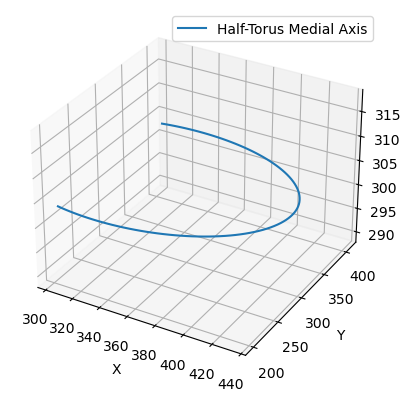

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define parameters
major_radius = 100  # Major radius of the torus
minor_radius = 30   # Minor radius of the torus

# Generate points for the half-torus section

center_torus = supercell.cell.diagonal() / 2

theta = np.linspace(-np.pi/2, np.pi/2, 100)  # Range from 0 to pi for a half-torus
x_torus = (major_radius + minor_radius * np.cos(theta)) * np.cos(theta) + center_torus[0]
y_torus = (major_radius + minor_radius * np.cos(theta)) * np.sin(theta) +center_torus[0]
z_torus = np.zeros(x_torus.shape) +center_torus[0] #minor_radius * np.sin(theta)


# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_torus, y_torus, z_torus, label='Half-Torus Medial Axis')
#ax.plot_surface(x_sphere1, y_sphere1, z_sphere1, color='b', alpha=0.3)
#ax.plot_surface(x_sphere2, y_sphere2, z_sphere2, color='b', alpha=0.3)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()


In [30]:
np.zeros(x_torus.shape)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [31]:
from pyevtk.hl import pointsToVTK
from pyevtk.hl import gridToVTK#, pointsToVTKAsTIN
#image = supercell.get_positions()
FILE_PATH1 = "20230615_dis_half_tourus_apt_noise_medial_axis"
print(FILE_PATH1)
x = np.ascontiguousarray(x_torus/10)
y= np.ascontiguousarray(y_torus/10)
z = np.ascontiguousarray(z_torus/10)
#label = np.ascontiguousarray( supercell.get_atomic_numbers())
pointsToVTK(FILE_PATH1,x,y,z, )

20230615_dis_half_tourus_apt_noise_medial_axis


'/Users/alaukiksaxena/tensorflow-test/Development_20230613/Dislocations_20230613/Synthetic_Data_Point_clouds/20230615_dis_half_tourus_apt_noise_medial_axis.vtu'

In [ ]:
# making a cylinder
"""import numpy as np

def is_inside_cylinder(position, center, axis, radius):
    displacement = position - center
    distance_to_axis = np.linalg.norm(displacement - np.dot(displacement, axis) * axis)
    return distance_to_axis < radius

center = supercell.cell.diagonal() / 2
axis = np.array([0, 0, 1])  # Change this to the desired axis of the cylinder
radius = 10  # Change this to the desired radius

for atom in supercell:
    if is_inside_cylinder(atom.position, center, axis, radius):
        atom.symbol = 'Cu'""";

#Making a torus

"""
def is_inside_torus(position, center, major_radius, minor_radius):
    displacement = position - center
    # Keep only x and y for cylindrical coordinates
    r_cylindrical = np.linalg.norm(displacement[:2])
    return (r_cylindrical - major_radius)**2 + displacement[2]**2 < minor_radius**2

center = supercell.cell.diagonal() / 2
major_radius = 100  # Adjust based on your requirements
minor_radius = 30 # Adjust based on your requirements

for atom in supercell:
    if is_inside_torus(atom.position, center, major_radius, minor_radius):
        atom.symbol = 'Cu'
        
"""